In [1]:
import os
import cv2
import numpy as np
import librosa

In [2]:
normal_path = './normal/ZCH0349.wav'
abnormal_path = "./abnormal/ZCH0548.wav"

In [3]:
normal_dir = './normal'
abnormal_dir = './abnormal'

In [4]:
audio_data, sampling_rate = librosa.load('./normal/ZCH0349.wav', sr=None, mono=True)

print(f"The sampling rate given: {sampling_rate} Hz")

The sampling rate given: 8000 Hz


In [15]:
def load_audio(file_path):
    audio_data, _ = librosa.load(file_path, sr=1000, mono=True)  
    return audio_data

In [8]:
import matplotlib.pyplot as plt
def plot_audio_waveform(audio_data, sample_rate):

    duration = len(audio_data) / sample_rate
    time = np.linspace(0, duration, len(audio_data))

    # Plot the amplitude versus time
    plt.figure(figsize=(10, 4))
    plt.plot(time, audio_data)
    plt.title('Amplitude vs Time')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
  
    plt.show()

NORMAL


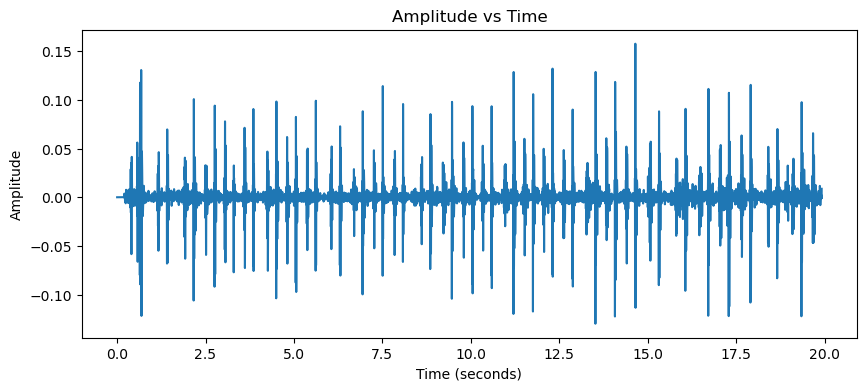

ABNORMAL


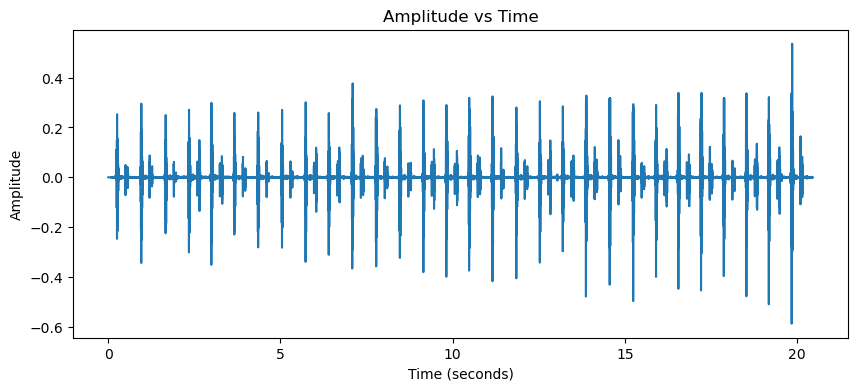

In [18]:
load_normal = load_audio(normal_path)
load_abnormal = load_audio(abnormal_path)
print("NORMAL")
plot_audio_waveform(load_normal,1000)
print("ABNORMAL")
plot_audio_waveform(load_abnormal,1000)

In [10]:
files_normal_path = os.listdir(normal_dir)
files_abnormal_path = os.listdir(abnormal_dir)
print("Number of audio_files in normal   folder is",len(files_normal_path))
print("Number of audio_files in abnormal folder is",len(files_abnormal_path))

Number of audio_files in normal   folder is 533
Number of audio_files in abnormal folder is 408


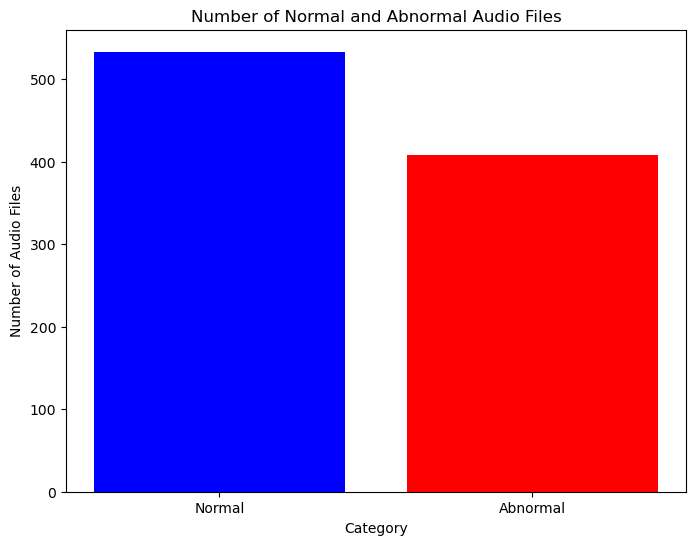

In [11]:
categories = ['Normal', 'Abnormal']
counts = [len(files_normal_path), len(files_abnormal_path)]

# Create the bar graph
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'red'])
plt.xlabel('Category')
plt.ylabel('Number of Audio Files')
plt.title('Number of Normal and Abnormal Audio Files')
plt.show()

In [20]:
import random


dataset = []

for filename in os.listdir(normal_dir):
    file_path = os.path.join(normal_dir, filename)
    audio_data = load_audio(file_path)
    dataset.append((audio_data, 0))

  
print("Number of audio_files in the folder is",len(dataset))

for filename in os.listdir(abnormal_dir):
    file_path = os.path.join(abnormal_dir, filename)
    audio_data = load_audio(file_path) 

    dataset.append((audio_data, 1)) 


print("Number of audio_files in the folder is",len(dataset))
random.shuffle(dataset)



Number of audio_files in the folder is 533
Number of audio_files in the folder is 941


In [24]:
import pandas as pd
data = {'audio_data': [entry[0] for entry in dataset], 'label': [entry[1] for entry in dataset]}
df = pd.DataFrame(data)


df['length'] = df['audio_data'].apply(len)

print(df)

                                            audio_data  label  length
0    [3.480818e-08, -3.3789547e-08, 2.9162038e-08, ...      1   19840
1    [5.5879354e-08, 1.6763806e-08, 7.636845e-08, -...      1   19840
2    [3.958121e-08, -2.561137e-08, 3.8184226e-08, -...      0   19840
3    [3.9115548e-08, -3.7252903e-08, 3.5390258e-08,...      1   19840
4    [3.7252903e-08, -3.1664968e-08, 3.7252903e-08,...      1   19840
..                                                 ...    ...     ...
936  [0.00093629956, -0.0012251735, 0.0016510487, -...      1   19880
937  [2.2351742e-08, -4.4703484e-08, -1.8626451e-09...      0   19880
938  [5.9604645e-08, -4.4703484e-08, 3.9115548e-08,...      1   19920
939  [3.3527613e-08, -3.7485734e-08, 2.6077032e-08,...      1   19840
940  [4.8428774e-08, -1.8626451e-08, 2.9802322e-08,...      0   19840

[941 rows x 3 columns]


In [28]:
df['length'].mean()

20056.86609989373

In [31]:

fixed_length = 20056


def preprocess_audio(audio_data):
    if len(audio_data) < fixed_length:
        mean_value = np.mean(audio_data)
        mean_value = round(mean_value)
        padded_audio_data = np.pad(audio_data, (mean_value, fixed_length - len(audio_data)), 'constant')
        return padded_audio_data
    
    elif len(audio_data) > fixed_length:
        truncated_audio_data = audio_data[:fixed_length]
        return truncated_audio_data
    else:
        
        return audio_data

In [32]:
import random


dataset = []

for filename in os.listdir(normal_dir):
    file_path = os.path.join(normal_dir, filename)
    audio_data = load_audio(file_path)
    audio_data= preprocess_audio(audio_data)
    dataset.append((audio_data, 0))

  
print("Number of audio_files in the folder is",len(dataset))

for filename in os.listdir(abnormal_dir):
    file_path = os.path.join(abnormal_dir, filename)
    audio_data = load_audio(file_path)
    audio_data= preprocess_audio(audio_data)
    dataset.append((audio_data, 1)) 


print("Number of audio_files in the folder is",len(dataset))
random.shuffle(dataset)



Number of audio_files in the folder is 533
Number of audio_files in the folder is 941


In [59]:
import numpy as np
import pywt

def extract_cwt_features(audio_data, sample_frequency=1000, num_scales=128):
    scales = np.arange(1,256 )
    cwt_data, _ = pywt.cwt(audio_data, scales, 'morl')
    cwt_features = np.abs(cwt_data)
    return cwt_features


temp = extract_cwt_features(dataset[0][0])
print(temp.shape)


(255, 20056)


In [62]:
def plot_cwt_scalogram(audio_data, sample_frequency, num_scales=128):
    scales = np.linspace(1, 256)

    coeffs, _ = pywt.cwt(audio_data, scales, 'morl')
    print(f"The shape of cwt extract: {coeffs.shape}")
    time = np.arange(0, len(audio_data)) / sampling_rate

    # Plot scalogram
    plt.figure(figsize=(10, 4))
    plt.imshow(np.abs(coeffs), extent=[0, len(audio_data), scales[-1], scales[0]],
               aspect='auto', cmap='jet')
    plt.colorbar(label='Magnitude')
    plt.xlabel('Time (s)')
    plt.ylabel('Scale')
    plt.title('Scalogram of Continuous Wavelet Transform')
    plt.show()

NORMAL
The shape of cwt extract: (50, 19920)


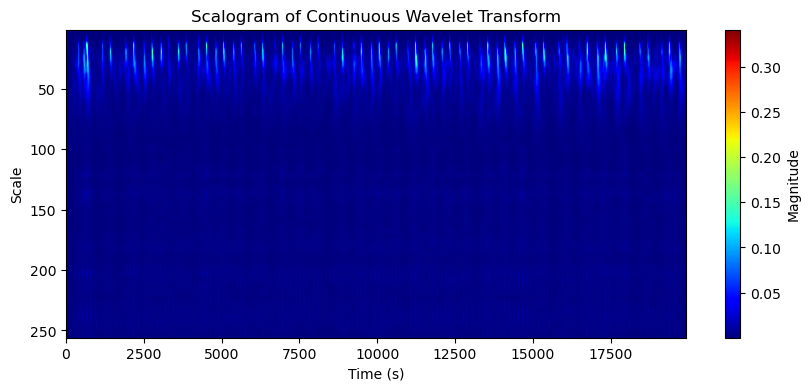

ABNORMAL
The shape of cwt extract: (50, 20457)


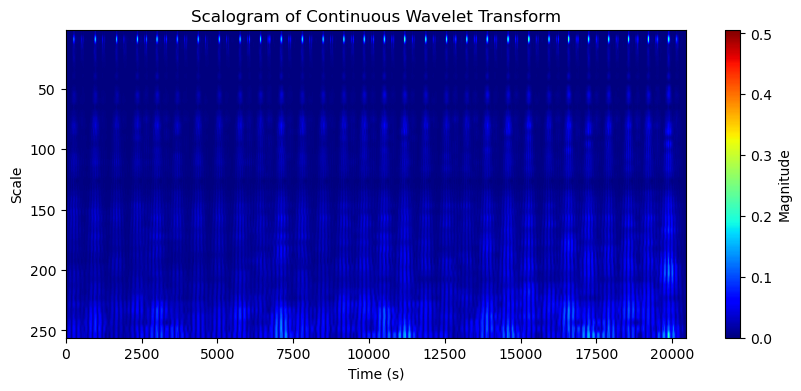

In [63]:
print("NORMAL")
plot_cwt_scalogram(load_normal,1000)
print("ABNORMAL")
plot_cwt_scalogram(load_abnormal,1000)

In [64]:
from sklearn.model_selection import train_test_split

X = [entry[0] for entry in dataset]  
y = [entry[1] for entry in dataset] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.decomposition import PCA

def extract_cwt_features_from_audio_dataset(audio_dataset, sample_rate, scales=np.arange(1, 128)):
  cwt_features_dataset = []

  for audio_data in audio_dataset:
      cwt_data, _ = pywt.cwt(audio_data, scales, 'morl')

      cwt_features = np.abs(cwt_data)
      pca = PCA(n_components=100) 
      reduced_data = pca.fit_transform(cwt_features)
      cwt_features_dataset.append(reduced_data)

  return cwt_features_dataset

In [66]:
X_train_extracted = extract_cwt_features_from_audio_dataset(X_train,1000)
X_test_extracted = extract_cwt_features_from_audio_dataset(X_test,1000)

In [67]:
Xtrain = np.array(X_train_extracted)
Xtest = np.array(X_test_extracted)
ytrain = np.array(y_train)
ytest = np.array(y_test)

Xtrain.shape , ytrain.shape, Xtest.shape, ytest.shape

((752, 127, 100), (752,), (189, 127, 100), (189,))

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,AveragePooling2D
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import InputLayer

model1 = Sequential([
    InputLayer(input_shape=(127,100,1)),
    Conv2D(32, kernel_size=(3, 3), strides=(2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(1, 1)),
    Conv2D(16, kernel_size=(4, 4), strides=(2, 2), activation='relu'),
    MaxPooling2D(pool_size=(4, 4), strides=(2, 2)),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
    
])
model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 63, 49, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 23, 16)        8208      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 10, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2240)              0         
                                                                 
 dense_2 (Dense)             (None, 8)                

In [79]:
model1.compile(optimizer="Adam",
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

model_hisotry = model1.fit(Xtrain, ytrain, validation_data=(Xtest, ytest),  epochs=10, verbose=1, batch_size=32)
a,t= model1.evaluate(Xtest, ytest, verbose= 0)
t



Epoch 1/10
24/24 [==============================] - 3s 44ms/step - loss: 0.0460 - accuracy: 0.9854 - val_loss: 3.0977 - val_accuracy: 0.7619
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0294 - accuracy: 0.9920 - val_loss: 3.1369 - val_accuracy: 0.7407
Epoch 3/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0206 - accuracy: 0.9960 - val_loss: 3.1915 - val_accuracy: 0.7196
Epoch 4/10
24/24 [==============================] - 1s 26ms/step - loss: 0.0196 - accuracy: 0.9934 - val_loss: 3.2775 - val_accuracy: 0.7302
Epoch 5/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0178 - accuracy: 0.9973 - val_loss: 3.3245 - val_accuracy: 0.7196
Epoch 6/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0175 - accuracy: 0.9947 - val_loss: 3.4278 - val_accuracy: 0.7249
Epoch 7/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0164 - accuracy: 0.9973 - val_loss: 3.4606 - val_accuracy: 0.7249
Epoch 8/10
24

0.7354497313499451

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer
from tensorflow.keras.optimizers import Adam

model1 = Sequential([
    InputLayer(input_shape=(127,100,1)),
    Conv2D(32, kernel_size=(3, 3), strides=(2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(1, 1)),
    Dropout(0.25),  # Dropout layer to reduce overfitting
    Conv2D(16, kernel_size=(4, 4), strides=(2, 2), activation='relu'),
    MaxPooling2D(pool_size=(4, 4), strides=(2, 2)),
    Flatten(),
    Dense(8, activation='relu'),
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(3, activation='softmax')
])

model1.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 63, 49, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 62, 48, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 62, 48, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 23, 16)        8208      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 10, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 2240)             

In [87]:
model1.compile(optimizer="Adam",
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

model_hisotry = model1.fit(Xtrain, ytrain, validation_data=(Xtest, ytest),  epochs=40, verbose=1, batch_size=32)
a,t= model1.evaluate(Xtest, ytest, verbose= 0)
t

Epoch 1/40
24/24 [==============================] - 4s 79ms/step - loss: 0.7283 - accuracy: 0.5918 - val_loss: 0.6710 - val_accuracy: 0.5661
Epoch 2/40
24/24 [==============================] - 2s 63ms/step - loss: 0.7265 - accuracy: 0.5731 - val_loss: 0.6845 - val_accuracy: 0.5714
Epoch 3/40
24/24 [==============================] - 2s 63ms/step - loss: 0.7225 - accuracy: 0.5718 - val_loss: 0.6705 - val_accuracy: 0.5661
Epoch 4/40
24/24 [==============================] - 2s 64ms/step - loss: 0.7059 - accuracy: 0.5878 - val_loss: 0.6566 - val_accuracy: 0.5873
Epoch 5/40
24/24 [==============================] - 2s 66ms/step - loss: 0.6955 - accuracy: 0.5957 - val_loss: 0.6527 - val_accuracy: 0.6508
Epoch 6/40
24/24 [==============================] - 2s 67ms/step - loss: 0.6866 - accuracy: 0.6184 - val_loss: 0.6533 - val_accuracy: 0.6402
Epoch 7/40
24/24 [==============================] - 2s 66ms/step - loss: 0.6867 - accuracy: 0.6170 - val_loss: 0.6725 - val_accuracy: 0.6190
Epoch 8/40
24

0.761904776096344

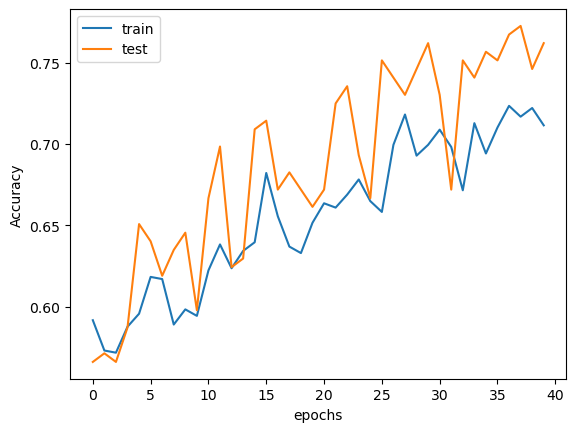

In [94]:
%matplotlib inline
plt.plot(model_hisotry.history["accuracy"])
plt.plot(model_hisotry.history["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc= "best")
plt.show()

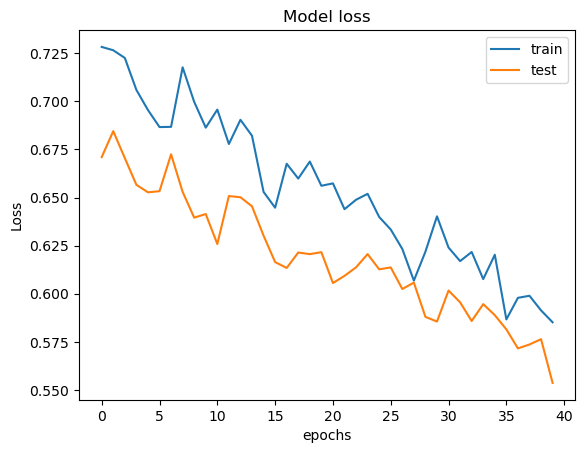

In [95]:
%matplotlib inline
plt.plot(model_hisotry.history["loss"])
plt.plot(model_hisotry.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc= "best")
plt.title("Model loss")
plt.show()

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred = model1.predict(Xtest)
y_pred_classes = np.argmax(y_pred, axis=1)  

accuracy = accuracy_score(ytest, y_pred_classes)
precision = precision_score(ytest, y_pred_classes, average='weighted')
recall = recall_score(ytest, y_pred_classes, average='weighted')
f1 = f1_score(ytest, y_pred_classes, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

6/6 [==============================] - 0s 12ms/step
Accuracy: 0.7619047619047619
Precision: 0.7750977835723598
Recall: 0.7619047619047619
F1-score: 0.7537568814164558


In [89]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)
cm

array([[95, 10],
       [35, 49]], dtype=int64)

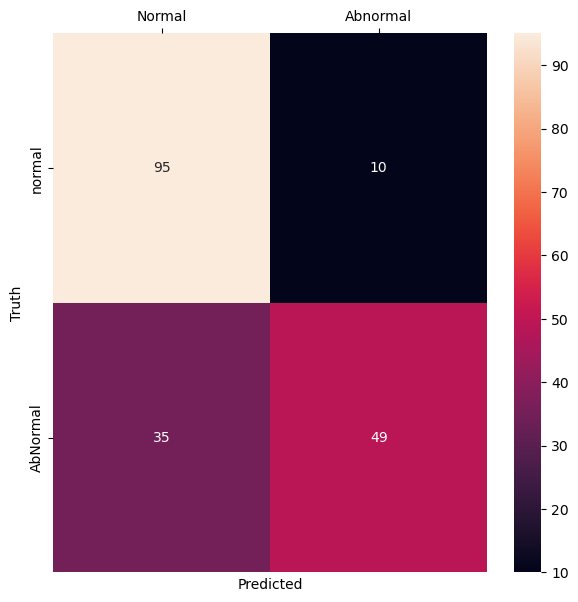

In [90]:
#Visualising the condfusion matrix in heat map
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,7))
ax= sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
ax.xaxis.set_ticklabels(["Normal", "Abnormal"])
ax.yaxis.set_ticklabels(["normal", "AbNormal"])
ax.xaxis.tick_top()

In [91]:
X_train_flattened = np.array([feature.flatten() for feature in X_train_extracted])
X_test_flattened = np.array([feature.flatten() for feature in X_test_extracted])
X_train_flattened.shape,X_test_flattened.shape

((752, 12700), (189, 12700))

In [93]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train_flattened, ytrain)

y_pred_1 = random_forest.predict(X_test_flattened)

accuracy = accuracy_score(ytest, y_pred_1)
precision = precision_score(ytest, y_pred_1, average='weighted')
recall = recall_score(ytest, y_pred_1, average='weighted')
f1 = f1_score(ytest, y_pred_1, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.7037037037037037
Precision: 0.7075325261761635
Recall: 0.7037037037037037
F1-score: 0.6954285414370439


In [96]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(127, 100, 3))

for layer in resnet_base.layers:
    layer.trainable = False

x = Flatten()(resnet_base.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x) 

model = Model(inputs=resnet_base.input, outputs=predictions)

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])




In [97]:
X_train_reduced_np = np.array(X_train_extracted)
X_test_reduced_np = np.array(X_test_extracted)

X_train_reshaped = X_train_reduced_np.reshape(X_train_reduced_np.shape[0], 127, 100, 1)
X_test_reshaped = X_test_reduced_np.reshape(X_test_reduced_np.shape[0], 127, 100, 1)

# Replicate the single channel to create a pseudo-RGB image
X_train_rgb = np.concatenate([X_train_reshaped, X_train_reshaped, X_train_reshaped], axis=-1)
X_test_rgb = np.concatenate([X_test_reshaped, X_test_reshaped, X_test_reshaped], axis=-1)


In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

history = model.fit(X_train_rgb, ytrain, epochs=10, batch_size=32,validation_data=(X_test_rgb, ytest))

Epoch 1/10
24/24 [==============================] - 28s 866ms/step - loss: 3.4976 - accuracy: 0.5705 - val_loss: 0.7420 - val_accuracy: 0.6931
Epoch 2/10
24/24 [==============================] - 18s 743ms/step - loss: 0.6719 - accuracy: 0.6543 - val_loss: 0.6719 - val_accuracy: 0.5185
Epoch 3/10
24/24 [==============================] - 18s 753ms/step - loss: 0.6258 - accuracy: 0.6915 - val_loss: 0.5415 - val_accuracy: 0.7090
Epoch 4/10
24/24 [==============================] - 18s 754ms/step - loss: 0.5439 - accuracy: 0.7221 - val_loss: 0.6700 - val_accuracy: 0.5291
Epoch 5/10
24/24 [==============================] - 18s 768ms/step - loss: 0.5147 - accuracy: 0.7473 - val_loss: 0.5577 - val_accuracy: 0.7143
Epoch 6/10
24/24 [==============================] - 18s 764ms/step - loss: 0.6395 - accuracy: 0.6862 - val_loss: 0.6668 - val_accuracy: 0.7196
Epoch 7/10
24/24 [==============================] - 18s 776ms/step - loss: 0.5443 - accuracy: 0.7447 - val_loss: 0.5812 - val_accuracy: 0.7249

In [101]:
a,t= model.evaluate(X_test_rgb, ytest, verbose= 0)
t

0.761904776096344

In [132]:
def build_model(hp):
    hp_neurons = hp.Int('neurons', min_value = 8, max_value = 32, step = 8)
    hp_filters = hp.Int('filters', min_value = 8, max_value = 32, step = 8)
    model = Sequential([
    InputLayer(input_shape=(127,100,1)),
    Conv2D(filters=hp_filters, kernel_size=(3, 3), strides=(2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(1, 1)),
    Conv2D(16, kernel_size=(4, 4), strides=(2, 2), activation='relu'),
    MaxPooling2D(pool_size=(4, 4), strides=(2, 2)),
    Flatten(),
    Dense(units=hp_neurons, activation='relu'),
    Dense(2, activation='softmax')])
    
    hp_learningrate = hp.Choice('learning_rate', values = [0.01,0.001, 0.0001])
    hp_batchsize = hp.Choice("batch_size", [8,16,32])
    
    model.compile(optimizer = keras.optimizers.Adam(learning_rate=hp_learningrate), loss = "sparse_categorical_crossentropy", metrics =["accuracy"])
    
    return model
    
    

In [133]:
from keras_tuner import RandomSearch
from tensorflow import keras
tuner = RandomSearch(
 build_model,
 objective='val_accuracy',
 max_trials=3,
 executions_per_trial=1,
 directory='keras_tuner_mnist',
 project_name='mnist_hyperparameter'
 )
hp_batch_size = tuner.oracle.get_space()['batch_size']
tuner.search(Xtrain, ytrain,  epochs=5, validation_data=(Xtest, ytest), batch_size=hp_batch_size)

Trial 3 Complete [00h 00m 09s]
val_accuracy: 0.7354497313499451

Best val_accuracy So Far: 0.7354497313499451
Total elapsed time: 00h 00m 29s


In [134]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_neurons = best_hps.get('neurons')
best_filters = best_hps.get('filters')
best_learning_rate = best_hps.get('learning_rate')
best_batch_size = best_hps.get('batch_size')
print(f"Best number of neurons and fillters: {best_neurons,best_filters}")
print(f"Best learning rate: {best_learning_rate}")
print(f"Best batch size: {best_batch_size}")
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
# Evaluate the best model
loss, accuracy = best_model.evaluate(Xtest, ytest)
print(f"Test accuracy of the best model: {accuracy}")

Best number of neurons and fillters: (32, 16)
Best learning rate: 0.0001
Best batch size: 16
6/6 [==============================] - 1s 13ms/step - loss: 0.6197 - accuracy: 0.7354
Test accuracy of the best model: 0.7354497313499451
